In [1]:
%load_ext google.cloud.bigquery

In [10]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 15 years ago. So if today is 2024.05.17 then the weather we want to forecast is for the date 2009.05.18. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part

In [3]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39800,99999,1929,12,11,45.500000,4,43.500000,4,981.400024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,37770,99999,1929,12,6,47.000000,4,41.299999,4,993.099976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,31590,99999,1929,12,6,45.799999,4,38.299999,4,974.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
3,30910,99999,1929,11,25,49.799999,4,NaN,<NA>,986.500000,...,NaN,<NA>,0.04,NaN,False,False,False,False,False,False
4,33790,99999,1929,8,29,62.000000,4,56.299999,4,1015.599976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
5,38110,99999,1929,11,2,47.799999,4,44.000000,4,1027.900024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
6,33790,99999,1929,9,17,55.700001,4,52.799999,4,1021.799988,...,NaN,<NA>,0.00,NaN,True,True,True,True,True,True
7,30750,99999,1929,12,7,43.299999,4,41.799999,4,966.599976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
8,34970,99999,1929,8,26,62.599998,4,56.000000,4,1023.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
9,37770,99999,1929,12,19,36.000000,4,28.799999,4,1033.099976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [4]:
query = """
SELECT
  *,
  FORMAT_DATE('%Y-%m-%d', DATE(year, month, day)) AS date,
FROM
  `bigquery-public-data.samples.gsod`
WHERE
  year BETWEEN 2005 AND 2009
  AND station_number BETWEEN 725300 AND 726300
"""

In [5]:
client = bigquery.Client()

query_job = client.query(query)
df = query_job.to_dataframe()

df.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
0,725464,99999,2005,11,1,61.200001,4,28.000000,4,NaN,...,<NA>,0.00,NaN,False,False,False,False,False,False,2005-11-01
1,725869,99999,2005,7,27,67.599998,4,39.700001,4,NaN,...,<NA>,0.00,NaN,False,False,False,False,False,False,2005-07-27
2,725940,99999,2005,12,12,47.200001,4,41.299999,4,1020.500000,...,<NA>,0.00,NaN,False,False,False,False,False,False,2005-12-12
3,725940,99999,2005,3,5,50.400002,4,46.000000,4,1024.500000,...,<NA>,0.14,NaN,False,False,False,False,False,False,2005-03-05
4,725525,99999,2005,9,24,85.099998,4,61.700001,4,1009.200012,...,<NA>,0.00,NaN,False,False,False,False,False,False,2005-09-24


In [6]:
df.to_csv("bigquery-public-data.csv", index=False)

### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [7]:
df['date'] = pd.to_datetime(df['date'])

df = df[
    (df['station_number'].between(725300, 725330)) &
    (df['date'].dt.year.between(2005, 2009))
]

df.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
75,725305,99999,2005,1,7,16.700001,23,13.100000,23,1021.200012,...,<NA>,0.01,NaN,False,False,False,False,False,False,2005-01-07
76,725305,99999,2005,7,19,77.699997,23,55.599998,23,1014.400024,...,<NA>,0.00,NaN,False,False,False,False,False,False,2005-07-19
80,725317,99999,2005,10,21,49.500000,23,47.099998,23,1011.799988,...,<NA>,0.59,NaN,False,False,False,False,False,False,2005-10-21
83,725327,99999,2005,12,1,26.000000,23,21.900000,23,1017.700012,...,<NA>,0.06,NaN,False,False,False,False,False,False,2005-12-01
88,725314,99999,2005,12,8,19.600000,23,13.700000,23,1031.400024,...,<NA>,0.18,NaN,True,True,True,True,True,True,2005-12-08


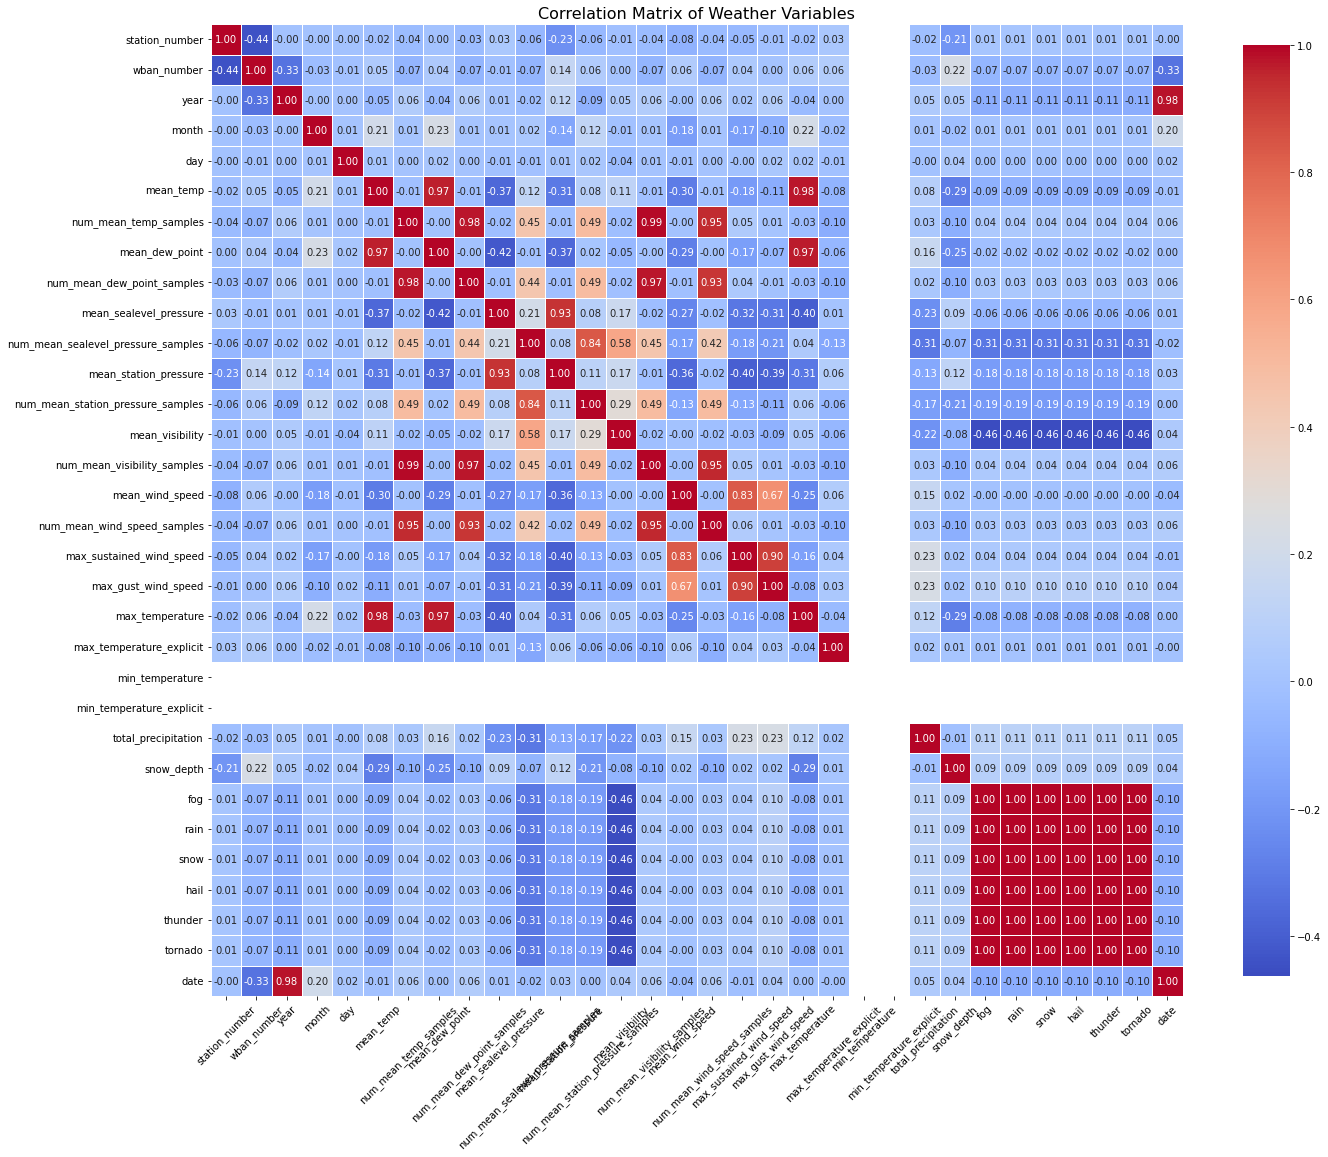

In [11]:
corr = df.corr()

plt.figure(figsize=(20, 18))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Weather Variables', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

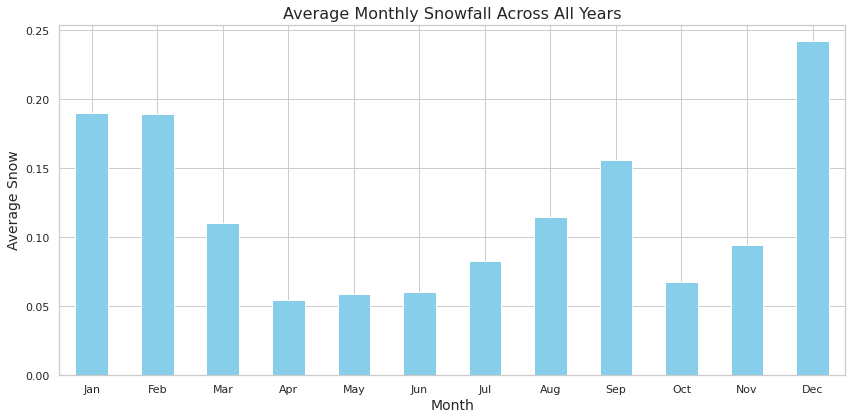

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

sns.set(style="whitegrid")

# Calculate mean monthly snowfall across all years
monthly_mean_snow = df.groupby('month')['snow'].mean()

plt.figure(figsize=(12, 6))
monthly_mean_snow.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Snowfall Across All Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Snow', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tight_layout()
plt.show()

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

In [13]:
df.drop(['year', 'month', 'day'], axis=1, inplace=True)
df.sort_values('date', inplace=True)

In [14]:
print(df.shape)
print(df.isnull().sum())

(18129, 29)
station_number                            0
wban_number                               0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            2
num_mean_dew_point_samples                2
mean_sealevel_pressure                 1838
num_mean_sealevel_pressure_samples     1838
mean_station_pressure                 17136
num_mean_station_pressure_samples     17136
mean_visibility                           3
num_mean_visibility_samples               3
mean_wind_speed                           5
num_mean_wind_speed_samples               5
max_sustained_wind_speed                 10
max_gust_wind_speed                    6661
max_temperature                           2
max_temperature_explicit                  2
min_temperature                       18129
min_temperature_explicit              18129
total_precipitation                     191
snow_depth                            17564
fog                 

In [15]:
# Remove nans within threshold
threshold = 0.5 * len(df)
df.dropna(thresh=threshold, axis=1, inplace=True)

In [16]:
# Remove remaining nans
for column in df.select_dtypes(include=['boolean']).columns:
    df[column].fillna(method='ffill', inplace=True)

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].astype(float)
df[numeric_columns] = df[numeric_columns].interpolate(method='linear')
df[numeric_columns] = df[numeric_columns].fillna(method='bfill')  # Backward fill for the first nan in the column

<ipython-input-16-a12f04b4b1a2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(method='ffill', inplace=True)
<ipython-input-16-a12f04b4b1a2>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column].fillna(method='ffill', inplace=True)
<ipython-input-16-a12f04b4b1a2>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_c

In [17]:
df.isnull().sum()

station_number                        0
wban_number                           0
mean_temp                             0
num_mean_temp_samples                 0
mean_dew_point                        0
num_mean_dew_point_samples            0
mean_sealevel_pressure                0
num_mean_sealevel_pressure_samples    0
mean_visibility                       0
num_mean_visibility_samples           0
mean_wind_speed                       0
num_mean_wind_speed_samples           0
max_sustained_wind_speed              0
max_gust_wind_speed                   0
max_temperature                       0
max_temperature_explicit              0
total_precipitation                   0
fog                                   0
rain                                  0
snow                                  0
hail                                  0
thunder                               0
tornado                               0
date                                  0
dtype: int64

In [18]:
# Define redundancy columns
features = ['fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']

In [19]:
# Use PCA to reduce dimensionality
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)
df['weather_component_snow'] = X_pca
df.drop(columns=features, inplace=True)

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [20]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=15*365)).split(' ')[0]


'2009-07-13'

In [21]:
df['weather_component_snow'] = df['weather_component_snow'].astype(int)

In [22]:
test_df = df[df['date'] == pd.Timestamp('2009-07-09')]
train_df = df[df['date'] < pd.Timestamp('2009-07-09')]

In [23]:
def create_lagged_features(df, lag_days=1):
    df_lagged = df.copy()
    for lag in range(1, lag_days + 1):
        df_lagged[f'snow_lag_{lag}'] = df_lagged['weather_component_snow'].shift(lag).fillna(0)
    df_lagged = df_lagged.dropna()
    return df_lagged

In [24]:
# Create lagged features for the training set
train_df = create_lagged_features(train_df)
test_df = create_lagged_features(test_df)

# Split features and labels
X_train = train_df.drop(columns=['weather_component_snow', 'date'])
y_train = train_df['weather_component_snow']

X_test = test_df.drop(columns=['weather_component_snow', 'date'])
y_test = test_df['weather_component_snow']

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [25]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=15*365)).split(' ')[0]

'2009-07-13'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [29]:
test_df['predictions'] = y_pred
print(test_df[["weather_component_snow", "predictions"]])

        weather_component_snow  predictions
193994                       0            0
65236                        0            0
249898                       0            0
35552                        0            0
259162                       0            0
347945                       0            0
35420                        0            0
170703                       0            0
377506                       0            0
331518                       0            0
